In [2]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() #60,000 training images and 10,000 test images

3


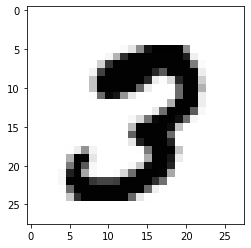

In [3]:
import matplotlib.pyplot as plt
image_index = 12345 # can be anything up to 60,000
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys') #showing image in greyscale

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [6]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))     #convolves input with kernel
model.add(MaxPooling2D(pool_size=(2, 2)))                             #reduces input representation
model.add(Flatten())                                                  # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))                          #converts negative values to 0
model.add(Dropout(0.2))                                               #prevents overfitting
model.add(Dense(10,activation=tf.nn.softmax))                         #produces probability distribution

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 250us/sample - loss: 0.2059 - acc: 0.9381
Epoch 2/10
60000/60000 [==============================] - 15s 250us/sample - loss: 0.0828 - acc: 0.9748
Epoch 3/10
60000/60000 [==============================] - 15s 256us/sample - loss: 0.0570 - acc: 0.9819
Epoch 4/10
60000/60000 [==============================] - 16s 272us/sample - loss: 0.0434 - acc: 0.9856
Epoch 5/10
60000/60000 [==============================] - 16s 271us/sample - loss: 0.0361 - acc: 0.9880
Epoch 6/10
60000/60000 [==============================] - 16s 271us/sample - loss: 0.0279 - acc: 0.9906
Epoch 7/10
60000/60000 [==============================] - 16s 270us/sample - loss: 0.0243 - acc: 0.9915
Epoch 8/10
60000/60000 [==============================] - 16s 272us/sample - loss: 0.0210 - acc: 0.9928
Epoch 9/10
60000/60000 [==============================] - 16s 274us/sample - loss: 0.0198 - acc: 0.9933
Epoch 10/10
60000/60000 [================

In [8]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 83us/sample - loss: 0.0621 - acc: 0.9848


[0.06211886661875114, 0.9848]

8


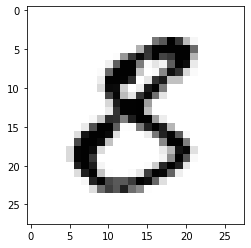

In [13]:
image_index = 1234 #any from 0-10,000
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())